## Projet Clustering

### Informations sur le Projet

- **Auteur** : Fono Colince  
  
- **Lien vers les datasets** :  
  - [Dataset : Customer Segmentation](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation)


### À propos de l'ensemble de données

### Contexte

Une entreprise automobile envisage de pénétrer de nouveaux marchés avec ses produits existants (P1, P2, P3, P4 et P5). Après une étude de marché approfondie, elle a déduit que le comportement du nouveau marché est similaire à celui du marché existant.

Sur leur marché actuel, l'équipe commerciale a classé tous les clients en 4 segments (A, B, C, D). Ensuite, ils ont effectué une approche et une communication segmentées pour un segment différent de clients. Cette stratégie a fonctionné exceptionnellement bien pour eux. Ils prévoient d'utiliser la même stratégie pour les nouveaux marchés et ont identifié 2627 nouveaux clients potentiels.

Vous devez aider le responsable à prédire le bon groupe de nouveaux clients.



### Description des Variables du Dataset

Ce tableau décrit les différentes variables présentes dans le dataset et leur définition.

### Contenu des Variables

| **Variable**             | **Définition**                                                                    |
|--------------------------|----------------------------------------------------------------------------------|
| **IDENTIFIANT**          | ID unique attribué à chaque client.                                              |
| **Genre**                | Sexe du client (par exemple : Homme, Femme).                                     |
| **Toujours marié**       | Indique si le client est toujours marié (Oui/Non).                               |
| **Âge**                  | Âge du client (en années).                                                       |
| **Diplômé**              | Indique si le client est diplômé (Oui/Non).                                      |
| **Profession**           | Métier ou profession exercée par le client.                                      |
| **Expérience de travail**| Nombre d'années d'expérience professionnelle du client.                          |
| **Score de dépenses**    | Score indiquant les habitudes de dépenses du client (échelle de 1 à 100, par ex.).|
| **Taille_de_la_famille** | Nombre total de membres dans la famille du client (incluant le client).          |
| **Var_1**                | Catégorie anonymisée assignée au client.                                         |
| **Segmentation**         | **(Cible)** Segment de clientèle auquel appartient le client (par exemple : A, B, C, D). |

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from utils import DataPreparation
import pickle

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
train = pd.read_csv('../data/automobile/Train.csv')
test =  pd.read_csv('../data/automobile/Test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
train.shape

(8068, 11)

In [4]:
train.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
#train = train.dropna()
#test = test.dropna()

In [7]:
DataPreparation.taux_na(train)

Work_Experience    10.275161
Family_Size         4.152206
Ever_Married        1.735250
Profession          1.536936
Graduated           0.966782
Var_1               0.941993
dtype: float64

In [8]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

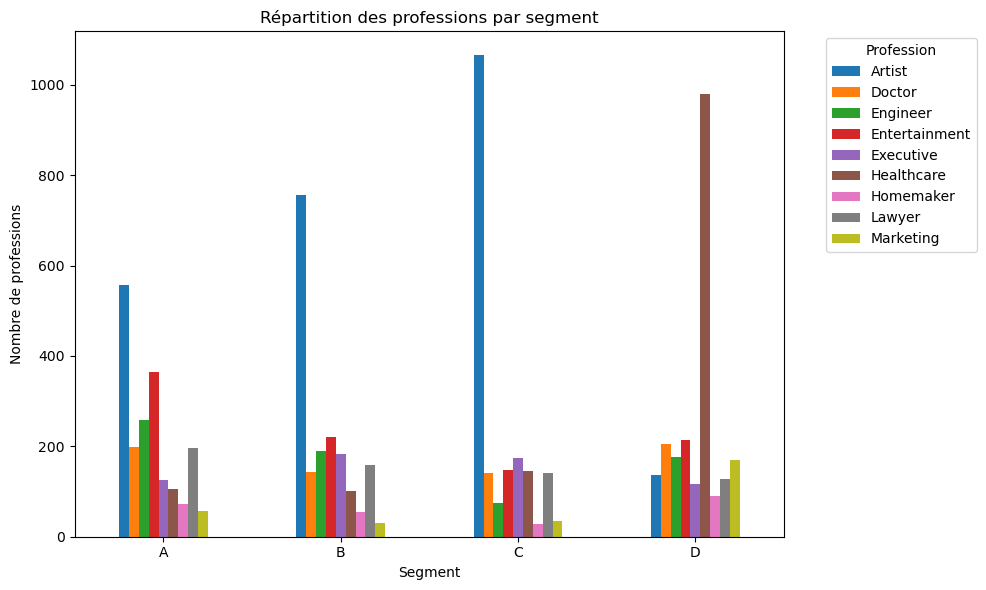

In [9]:
profession_counts = train.groupby('Segmentation')['Profession'].value_counts()

profession_counts.unstack().plot(kind='bar', figsize=(10, 6))

plt.title("Répartition des professions par segment")
plt.xlabel("Segment")
plt.ylabel("Nombre de professions")
plt.xticks(rotation=0)
plt.legend(title="Profession", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


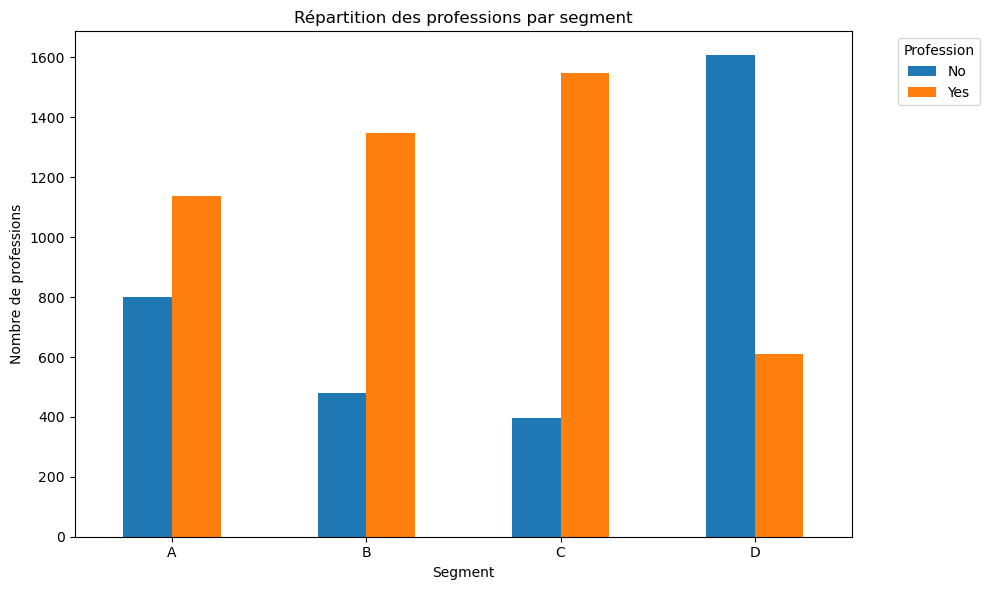

In [95]:
Ever_Married = train.groupby('Segmentation')['Ever_Married'].value_counts()

Ever_Married.unstack().plot(kind='bar', figsize=(10, 6))

plt.title("Répartition des professions par segment")
plt.xlabel("Segment")
plt.ylabel("Nombre de professions")
plt.xticks(rotation=0)
plt.legend(title="Profession", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
profile = ProfileReport(train, title="Rapport de Profiling", explorative=True)

profile.to_notebook_iframe()

#profile.to_file("rapport_profiling.html")

<Axes: xlabel='Work_Experience'>

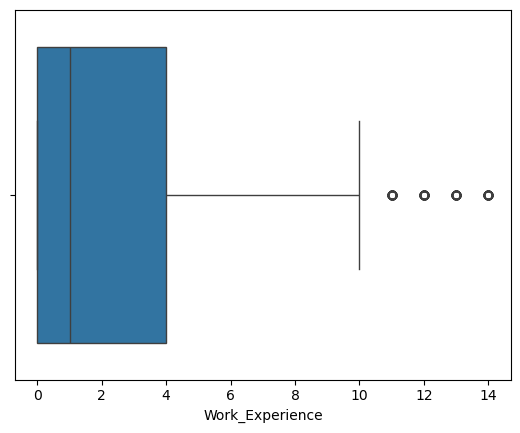

In [10]:
sns.boxplot(train,x='Work_Experience')

In [14]:
train = DataPreparation.impute_missing_values(train)
print(DataPreparation.taux_na(train))
train.head()

Series([], dtype: float64)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [15]:
train['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'], dtype=object)

### Preprocessing

In [16]:
train , id , labelEncoder = DataPreparation.preprocessing(train,idcol='ID',dropcol=[])


In [17]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


#### visualisation des groupe naturelle de client

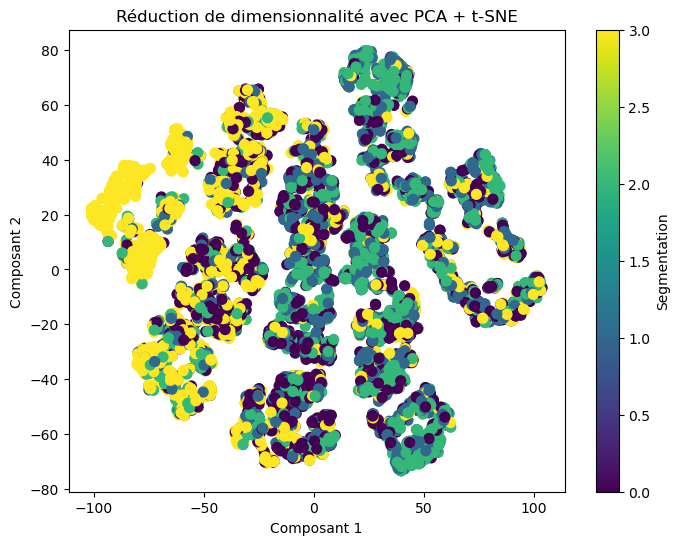

In [24]:
y = train['Segmentation'].to_numpy()
X = train.drop(['Segmentation'], axis=1).to_numpy()


pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X)

# Appliquer t-SNE sur les données réduites par PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsn = tsne.fit_transform(X_pca)

# Visualiser les résultats du t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar(label='Segmentation')
plt.title('Réduction de dimensionnalité avec PCA + t-SNE')
plt.xlabel('Composant 1')
plt.ylabel('Composant 2')
plt.show()

### test dataset

In [18]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [20]:
test.shape

(2627, 11)

In [21]:
DataPreparation.taux_na(test)

Work_Experience    10.239817
Family_Size         4.301485
Ever_Married        1.903312
Profession          1.446517
Var_1               1.218120
Graduated           0.913590
dtype: float64

In [22]:
test = DataPreparation.impute_missing_values(test)
DataPreparation.taux_na(test)

Series([], dtype: float64)

In [23]:
test , idTest , labelEncoderTest = DataPreparation.preprocessing(test,idcol='ID',dropcol=[])


In [24]:
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,1
1,1,1,37,1,5,8.0,0,4.0,5,0
2,0,1,69,0,0,0.0,2,1.0,5,0
3,1,1,59,0,4,11.0,1,2.0,5,1
4,0,0,19,0,8,1.0,2,4.0,5,0


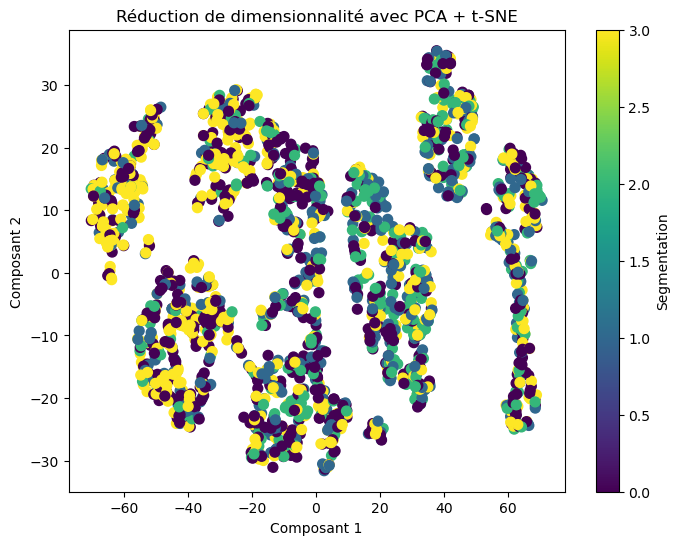

In [76]:
y = test['Segmentation'].to_numpy()
X = test.drop(['Segmentation'], axis=1).to_numpy()


pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X)

# Appliquer t-SNE sur les données réduites par PCA
tsne = TSNE(n_components=2, random_state=42)
X_tsn = tsne.fit_transform(X_pca)

# Visualiser les résultats du t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar(label='Segmentation')
plt.title('Réduction de dimensionnalité avec PCA + t-SNE')
plt.xlabel('Composant 1')
plt.ylabel('Composant 2')
plt.show()

### logistique regression

In [25]:
y_train = train['Segmentation'].to_numpy()
X_train = train.drop('Segmentation',axis=1).to_numpy()

y_test = test['Segmentation'].to_numpy()
X_test = test.drop('Segmentation',axis=1).to_numpy()

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


ypredic = model.predict(X_test)

In [26]:
print(classification_report(y_test,ypredic))

              precision    recall  f1-score   support

           0       0.35      0.30      0.33       846
           1       0.22      0.10      0.14       550
           2       0.24      0.40      0.30       472
           3       0.42      0.48      0.45       759

    accuracy                           0.33      2627
   macro avg       0.31      0.32      0.30      2627
weighted avg       0.32      0.33      0.32      2627



In [27]:
accuracy_score(y_test,ypredic)

0.3300342596117244

In [28]:
with open("../modeles/segmentation.pkl", "wb") as f:
    pickle.dump(model, f)

### Random Forest

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [121]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.28      0.31       846
           1       0.25      0.23      0.24       550
           2       0.26      0.33      0.29       472
           3       0.42      0.46      0.44       759

    accuracy                           0.33      2627
   macro avg       0.32      0.32      0.32      2627
weighted avg       0.33      0.33      0.33      2627



### Dataset Finale

In [30]:
train = pd.read_csv('../data/automobile/Train.csv')
test = pd.read_csv('../data/automobile/Test.csv')

# Fusionner les DataFrames train et test
data = pd.concat([train, test], axis=0).reset_index(drop=True)

print(data.shape)

data.head()

(10695, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [31]:
data['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [124]:
DataPreparation.taux_na(data)

Work_Experience    10.266480
Family_Size         4.188873
Ever_Married        1.776531
Profession          1.514727
Var_1               1.009818
Graduated           0.953717
dtype: float64

In [125]:
data = DataPreparation.impute_missing_values(data)

In [126]:
DataPreparation.taux_na(data)

Series([], dtype: float64)

In [127]:
data , ID , labelEncoder = DataPreparation.preprocessing(data,idcol='ID',dropcol=[])
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


In [128]:
y = data['Segmentation'].to_numpy()
X = data.drop(['Segmentation'],axis=1).to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_predic = model.predict(X_test)


In [129]:
print(classification_report(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       584
           1       0.34      0.07      0.11       490
           2       0.43      0.60      0.50       472
           3       0.55      0.68      0.61       593

    accuracy                           0.45      2139
   macro avg       0.43      0.44      0.41      2139
weighted avg       0.43      0.45      0.42      2139



## Perceptron Multi-Couche (MLP)

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Préparation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Si y_train est un entier (par exemple 0, 1, 2, 3), pas besoin de one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Définir le modèle
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  # Pour éviter le surapprentissage
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='sigmoid'),
    Dropout(0.3),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Sortie pour classification multiclasse
])

# Compiler le modèle
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_categorical, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1)

# Évaluer le modèle
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

print("Accuracy :", accuracy_score(y_test, y_pred_classes))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_classes))


Epoch 1/100


c:\Users\etudiant\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3336 - loss: 1.3908 - val_accuracy: 0.4457 - val_loss: 1.2169
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4202 - loss: 1.2529 - val_accuracy: 0.4562 - val_loss: 1.2034
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4434 - loss: 1.2405 - val_accuracy: 0.4614 - val_loss: 1.2022
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 1.2167 - val_accuracy: 0.4737 - val_loss: 1.1991
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4585 - loss: 1.2197 - val_accuracy: 0.4685 - val_loss: 1.1961
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4552 - loss: 1.2193 - val_accuracy: 0.4743 - val_loss: 1.1938
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4591 - loss: 1.2129 - val_accuracy: 0.4708 - val_loss: 1.1915
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4512 - loss: 1.2200 - val_accuracy: 0.4778

In [147]:
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.42      0.32      0.36       584
           1       0.38      0.32      0.35       490
           2       0.49      0.54      0.51       472
           3       0.56      0.71      0.62       593

    accuracy                           0.48      2139
   macro avg       0.46      0.47      0.46      2139
weighted avg       0.46      0.48      0.46      2139



## XGBoost 

In [139]:
import xgboost as xgb



# Convertir en format DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les hyperparamètres
params = {
    'objective': 'multi:softmax',  # Classification multi-classes
    'num_class': len(data['Segmentation'].unique()),  # Nombre de classes
    'eval_metric': 'mlogloss',  # Log-loss pour l'évaluation
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Entraîner le modèle
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Prédictions
y_pred = xgb_model.predict(dtest)

# Évaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       584
           1       0.40      0.30      0.34       490
           2       0.52      0.55      0.54       472
           3       0.59      0.66      0.62       593

    accuracy                           0.49      2139
   macro avg       0.48      0.49      0.48      2139
weighted avg       0.49      0.49      0.49      2139

Accuracy: 0.49368863955119213
